# Plot the result of experiment

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import toml
import os
import re


def extract_toml_storage(file, type, scheme):
    try:
        content = toml.load(file)
        res = {}

        for result in content['perf_result']:
            config = result['config']
            if config['perf_type'] == type and config['fse_type'] == scheme:
                # Bytes -> Megabytes
                client_storage = float(result['result']['client_storage']) / 2**20
                server_stroage = float(result['result']['server_storage']) / 2**20

                column_name = config['attributes'][0]
                if not column_name in res:
                    res[column_name] = [(client_storage, server_stroage)]
                else:
                    res[column_name].append((client_storage, server_stroage))

        return res
    except:
        raise Exception("Cannot extract toml storage.")


def extract_toml_time(file, type, scheme):
    try:
        content = toml.load(file)
        res = {}

        for result in content['perf_result']:
            config = result['config']
            if config['perf_type'] == type and config['fse_type'] == scheme:
                time = result['result']['latency']
                if 'ms' in time:
                    time = float(re.sub(r'ms.*', '', time))
                elif 'µs' in time:
                    time = float(re.sub(r'µs.*', '', time)) / 1000
                elif 's' in time:
                    time = float(re.sub(r's.*', '', time)) * 1000

                column_name = config['attributes'][0]
                if not column_name in res:
                    res[column_name] = [time]
                else:
                    res[column_name].append(time)

        return res
    except:
        raise Exception("Extract toml time error!")


def analyze_database_performance(name, type, scheme, is_time=True):
    result = []
    path = "../eval/data/"

    for dirname, subdirlist, filelist in os.walk(path):
        for fname in filelist:
            if name in fname:
                print("Scanning {}.".format(fname))
                full_name = dirname + '/' + fname
                if is_time:
                    result.append(extract_toml_time(
                        full_name, type, scheme))
                else:
                    result.append(extract_toml_storage(
                        full_name, type, scheme))
    return result


Scanning query_order_number.toml.
Scanning query_order_number.toml.
Scanning query_order_number.toml.
Scanning query_order_number.toml.
Scanning query_order_number.toml.
Scanning query_add_to_cart_order.toml.
Scanning query_add_to_cart_order.toml.
Scanning query_add_to_cart_order.toml.
Scanning query_add_to_cart_order.toml.
Scanning query_add_to_cart_order.toml.
Scanning query_order_hour_of_day.toml.
Scanning query_order_hour_of_day.toml.
Scanning query_order_hour_of_day.toml.
Scanning query_order_hour_of_day.toml.
Scanning query_order_hour_of_day.toml.
Scanning query_reordered.toml.
Scanning query_reordered.toml.
Scanning query_reordered.toml.
Scanning query_reordered.toml.
Scanning query_reordered.toml.
Scanning query_AGEP.toml.
Scanning query_AGEP.toml.
Scanning query_AGEP.toml.
Scanning query_AGEP.toml.
Scanning query_AGEP.toml.
Scanning query_SCHL.toml.
Scanning query_SCHL.toml.
Scanning query_SCHL.toml.
Scanning query_SCHL.toml.
Scanning query_SCHL.toml.
Scanning query_CIT.toml.


/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_26393/1611225344.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


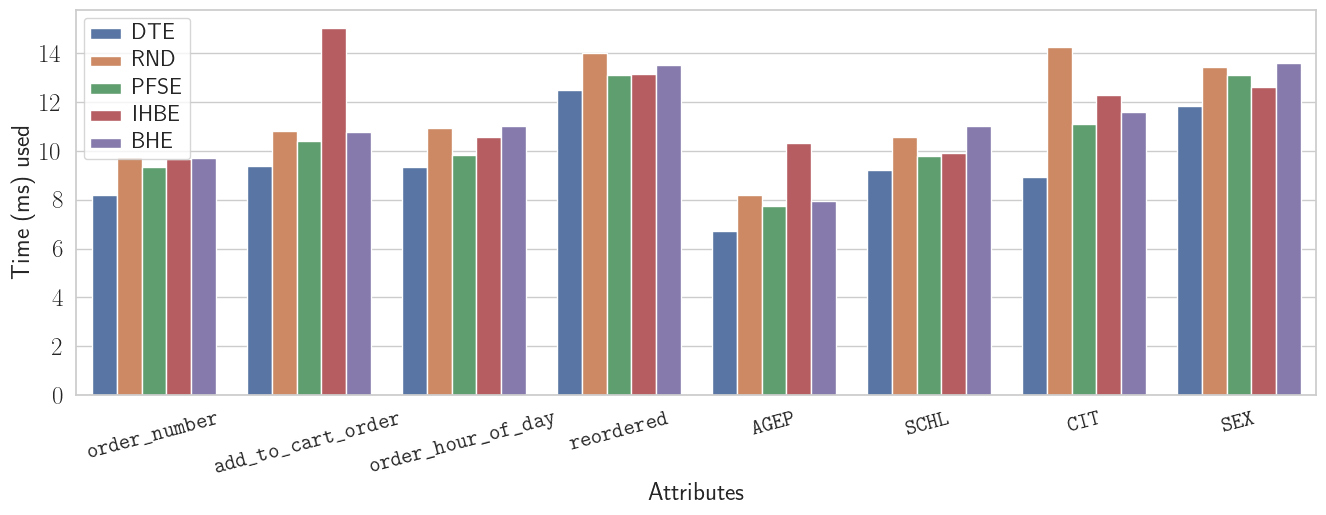

In [2]:
columns = ['order_number', 'add_to_cart_order', 'order_hour_of_day',
           'order_dow', 'AGEP', 'SPORDER', 'CIT', 'SEX']
schemes = ['DTE', 'RND', 'PFSE', 'IHBE', 'BHE']

xs = []
ys = []
for column in columns:
    xs.extend([column] * len(schemes))
    name = 'query_' + column + '.toml'
    ys += analyze_database_performance(
        name, 'query', 'dte')[0][column]
    ys += analyze_database_performance(
        name, 'query', 'rnd')[0][column]
    ys += analyze_database_performance(
        name, 'query', 'pfse')[0][column]
    ys += analyze_database_performance(
        name, 'query', 'lpfse_ihbe')[0][column]
    ys += analyze_database_performance(
        name, 'query', 'lpfse_bhe')[0][column]
print(ys, xs)

xs = ['\\texttt{' + x + '}' for x in xs]
ys = [np.log2(y) for y in ys]
hue = schemes * len(columns)
plt.rc('text', usetex=True)
plt.figure(figsize=(16, 5))

sns.set(style="whitegrid")
g = sns.barplot(x=xs, y=ys, hue=hue)
g.set_xlabel('Attributes', fontsize=18)
g.set_ylabel('Time (ms) used', fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=16, rotation=15)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16')  # for legend title
plt.savefig('./query_overall.pdf', bbox_inches='tight')


## Micro - Query on `order_number`

Scanning query_delta_order_number.toml.
Scanning query_delta_order_number.toml.
Scanning query_delta_order_number.toml.
[0.331083, 1.615954, 10.63196, 47.311128, 0.416668, 2.375345, 18.911118, 197.287364, 0.603615, 2.059969, 11.299269, 201.969761, 0.373637, 1.515208, 13.004729, 168.538992, 0.517062, 1.962151, 14.183952, 112.880315, 0.435456, 2.410109, 13.013619, 136.691862, 0.358567, 1.862156, 11.21885, 123.974006]


/tmp/ipykernel_344278/4092245949.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/tmp/ipykernel_344278/4092245949.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


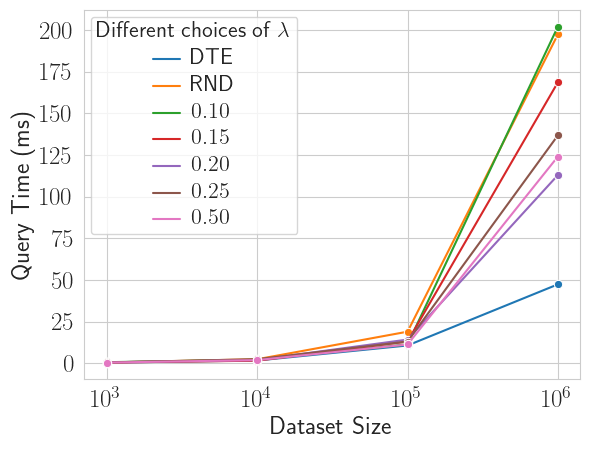

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('query_delta_order_number.toml', 'query', 'dte')[0]['order_number']
ys.extend(analyze_database_performance('query_delta_order_number.toml', 'query', 'rnd')[0]['order_number'])
ys.extend(analyze_database_performance('query_delta_order_number.toml', 'query', 'pfse')[0]['order_number'])
print(ys)
ys = [x for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': ys[:4],
  'RND': ys[4:8],
  '$0.10$': ys[8:12],
  '$0.15$': ys[12:16],
  '$0.20$': ys[16:20],
  '$0.25$': ys[20:24],
  '$0.50$': ys[24:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Query Time (ms)', hue='Different choices of $\lambda$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Query Time (ms)', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./query_delta_order_number.pdf', bbox_inches='tight')

Scanning insert_f_theta_order_number.toml.
Scanning insert_f_theta_order_number.toml.
Scanning insert_f_theta_order_number.toml.
[10.217312, 86.412612, 647.036143, 6395.552415, 18.173777, 90.030153, 657.537231, 7248.06359, 72.80271, 597.771558, 6546.807453, 72608.35704900001, 51.755608, 494.539068, 4717.65915, 54916.512886, 57.721595, 350.75545, 3954.3801689999996, 45852.847374, 45.24018, 314.793952, 3116.439646, 37555.358657]


/tmp/ipykernel_344278/3673942970.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/tmp/ipykernel_344278/3673942970.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


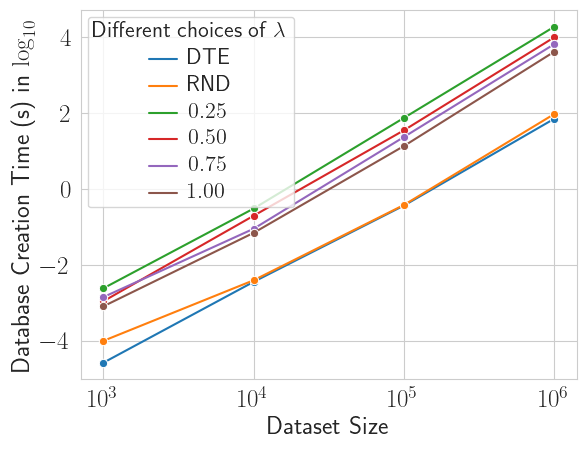

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'dte')[0]['order_number']
ys.extend(analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'rnd')[0]['order_number'])
ys.extend(analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'pfse')[0]['order_number'])
print(ys)
ys = [np.log(x / 1000) for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': ys[:4],
  'RND': ys[4:8],
  '$0.25$': ys[8:12],
  '$0.50$': ys[12:16],
  '$0.75$': ys[16:20],
  '$1.00$': ys[20:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Database Creation Time (s) in $\log_{10}$', hue='Different choices of $\lambda$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Database Creation Time (s) in $\log_{10}$', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)

plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./insert_f_theta_order_number.pdf', bbox_inches='tight')

Scanning insert_f_theta_order_number.toml.
Scanning insert_f_theta_order_number.toml.
Scanning insert_f_theta_order_number.toml.
[(0.0, 0.01171875), (0.0, 0.01171875), (0.0, 0.02734375), (0.0, 2.203125), (0.011595726013183594, 0.01171875), (0.1146240234375, 0.01171875), (1.14459228515625, 0.37890625), (11.44427490234375, 0.40234375), (0.0020732879638671875, 0.01171875), (0.0025177001953125, 0.04296875), (0.0025634765625, 4.18359375), (0.0026092529296875, 357.515625), (0.00197601318359375, 0.01171875), (0.0024700164794921875, 0.08203125), (0.0025177001953125, 1.125), (0.0025177001953125, 297.70703125), (0.0020742416381835938, 0.01171875), (0.0024700164794921875, 0.17578125), (0.00249481201171875, 1.7890625), (0.00249481201171875, 293.83984375), (0.0021734237670898438, 0.01171875), (0.002471923828125, 0.55859375), (0.002471923828125, 4.09765625), (0.002471923828125, 257.12890625)]


/tmp/ipykernel_344278/1499625234.py:11: RuntimeWarning: divide by zero encountered in log
  client = [np.log(x[0]) for x in ys]
/tmp/ipykernel_344278/1499625234.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/tmp/ipykernel_344278/1499625234.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


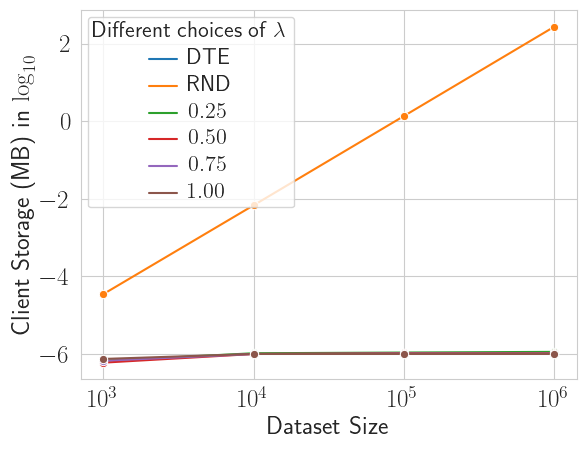

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'dte', False)[0]['order_number']
ys.extend(analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'rnd', False)[0]['order_number'])
ys.extend(analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'pfse', False)[0]['order_number'])
print(ys)

client = [np.log(x[0]) for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': client[:4],
  'RND': client[4:8],
  '$0.25$': client[8:12],
  '$0.50$': client[12:16],
  '$0.75$': client[16:20],
  '$1.00$': client[20:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Client Storage (MB) in $\log_{10}$', hue='Different choices of $\lambda$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Client Storage (MB) in $\log_{10}$', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)

plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./client_f_theta_order_number.pdf', bbox_inches='tight')

In [ ]:
server = [np.log(x[1]) for x in ys]

df = pd.DataFrame({
    'Dataset Size': xs,
    'DTE': server[:4],
    'RND': server[4:8],
    '$0.25$': server[8:12],
    '$0.50$': server[12:16],
    '$0.75$': server[16:20],
    '$1.00$': server[20:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Server Storage (MB) in $\log_{10}$', hue='Different choices of $\lambda$',
                 data=pd.melt(df, id_vars=[
                              'Dataset Size'], value_name='Server Storage (MB) in $\log_{10}$', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)

plt.setp(g.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16')  # for legend title
plt.savefig('./server_f_theta_order_number.pdf', bbox_inches='tight')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('query_delta_order_number.toml', 'query', 'dte')[0]['order_number']
ys.extend(analyze_database_performance('query_delta_order_number.toml', 'query', 'rnd')[0]['order_number'])
ys.extend(analyze_database_performance('query_delta_order_number.toml', 'query', 'pfse')[0]['order_number'])
print(ys)
ys = [x for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': ys[:4],
  'RND': ys[4:8],
  '$0.10$': ys[8:12],
  '$0.15$': ys[12:16],
  '$0.20$': ys[16:20],
  '$0.25$': ys[20:24],
  '$0.50$': ys[24:]
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Query Time (ms)', hue='Different choices of $\delta$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Query Time (ms)', var_name='Different choices of $\delta$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./query_delta_order_number.pdf', bbox_inches='tight')

Scanning insert_delta_order_number.toml.
Scanning insert_delta_order_number.toml.
Scanning insert_delta_order_number.toml.
[9.963081, 82.005906, 622.069465, 6333.670012, 19.539739, 76.038795, 654.172124, 7412.593431, 53.854808, 515.396865, 4727.524664, 59513.363056, 45.476034, 329.657265, 2929.920556, 32599.707646, 28.166079, 225.429678, 2050.078439, 21866.491586, 27.996326, 177.400563, 1551.654556, 16408.106274, 30.073007, 98.530494, 696.368698, 6814.71917]


/tmp/ipykernel_344278/2996116444.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/tmp/ipykernel_344278/2996116444.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


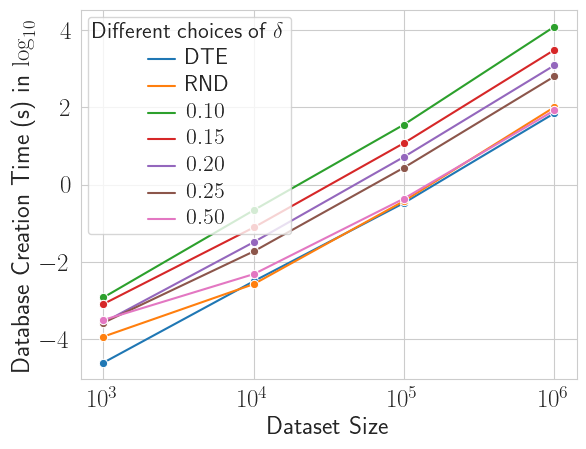

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('insert_delta_order_number.toml', 'insert', 'dte')[0]['order_number']
ys.extend(analyze_database_performance('insert_delta_order_number.toml', 'insert', 'rnd')[0]['order_number'])
ys.extend(analyze_database_performance('insert_delta_order_number.toml', 'insert', 'pfse')[0]['order_number'])
print(ys)
ys = [np.log(x / 1000) for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': ys[:4],
  'RND': ys[4:8],
  '$0.10$': ys[8:12],
  '$0.15$': ys[12:16],
  '$0.20$': ys[16:20],
  '$0.25$': ys[20:24],
  '$0.50$': ys[24:]
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Database Creation Time (s) in $\log_{10}$', hue='Different choices of $\delta$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Database Creation Time (s) in $\log_{10}$', var_name='Different choices of $\delta$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./insert_delta_order_number.pdf', bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('insert_delta_order_number2.toml', 'insert', 'dte', False)[0]['order_number']
ys.extend(analyze_database_performance('insert_delta_order_number2.toml', 'insert', 'rnd', False)[0]['order_number'])
ys.extend(analyze_database_performance('insert_delta_order_number2.toml', 'insert', 'pfse', False)[0]['order_number'])
print(ys)

client = [np.log(x[0]) for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  'DTE': client[:4],
  'RND': client[4:8],
  '$0.10$': client[8:12],
  '$0.15$': client[12:16],
  '$0.20$': client[16:20],
  '$0.25$': client[20:24],
  '$0.50$': client[24:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Client Storage (MB) in $\log_{10}$', hue='Different choices of $\delta$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Client Storage (MB) in $\log_{10}$', var_name='Different choices of $\delta$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)

plt.setp(g.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16') # for legend title

plt.savefig('./client_delta_order_number.pdf', bbox_inches='tight')

In [ ]:
server = [np.log(x[1]) for x in ys]

df = pd.DataFrame({
    'Dataset Size': xs,
    'DTE': server[:4],
    'RND': server[4:8],
    '$0.10$': server[8:12],
    '$0.15$': server[12:16],
    '$0.20$': server[16:20],
    '$0.25$': server[20:24],
    '$0.50$': server[24:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Server Storage (MB) in $\log_{10}$', hue='Different choices of $\delta$',
                 data=pd.melt(df, id_vars=[
                              'Dataset Size'], value_name='Server Storage (MB) in $\log_{10}$', var_name='Different choices of $\delta$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)

plt.setp(g.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(g.get_legend().get_title(), fontsize='16')  # for legend title
plt.savefig('./server_delta_order_number.pdf', bbox_inches='tight')
